In [1]:
library(data.table)
library(caret)
set.seed(42)
iris.dt <- as.data.table(iris)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
train.idxs <- createDataPartition(iris.dt$Species, p = 0.8)$Resample1
train <- iris.dt[train.idxs]
test <- iris.dt[-train.idxs]

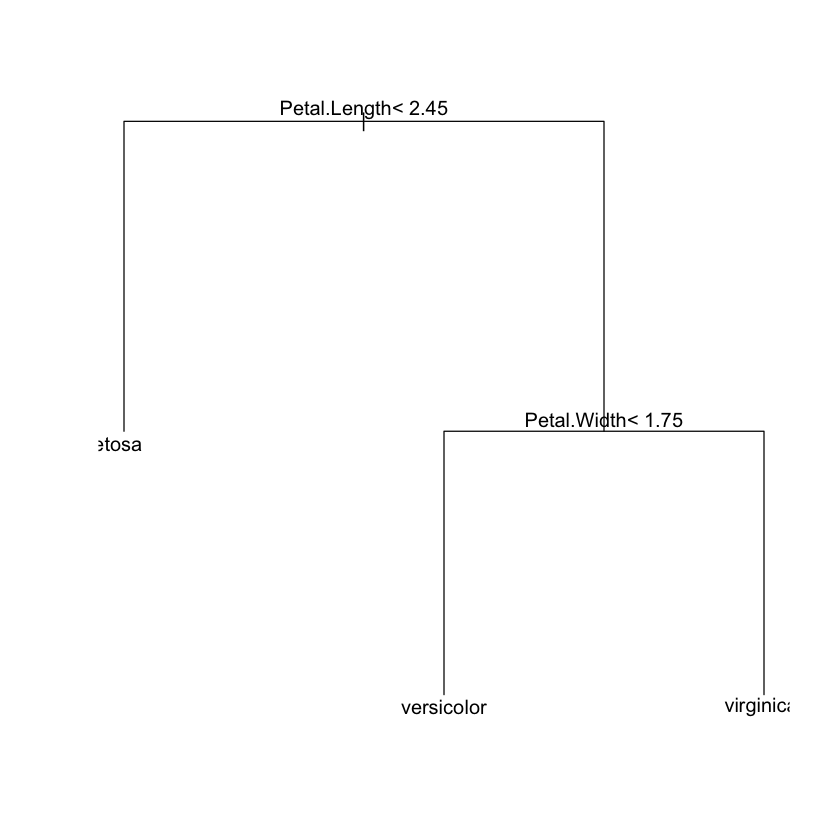

In [3]:
library(rpart)
model <- rpart(Species ~ ., data = train, method = 'class', control = list(minsplit = 1))
plot(model)
text(model)

In [4]:
pred.matrix <- predict(model, test)

In [5]:
# gets max across rows
preds <- colnames(pred.matrix)[apply(pred.matrix, 1, which.max)]

In [6]:
confusionMatrix(preds, test$Species)
# works perfectly, but too easy of an example

ERROR: Error: `data` and `reference` should be factors with the same levels.


In [7]:
filename <- '/Users/mbusch/OneDrive - Regis University/MSDS/680/MSDS680_ncg_S8W1_18/week1/data/auto.dt.nona.csv'
mpg.dt <- fread(filename)
train.idxs <- createDataPartition(mpg.dt$mpg, p = 0.8)$Resample1
train <- mpg.dt[train.idxs]
test <- mpg.dt[-train.idxs]

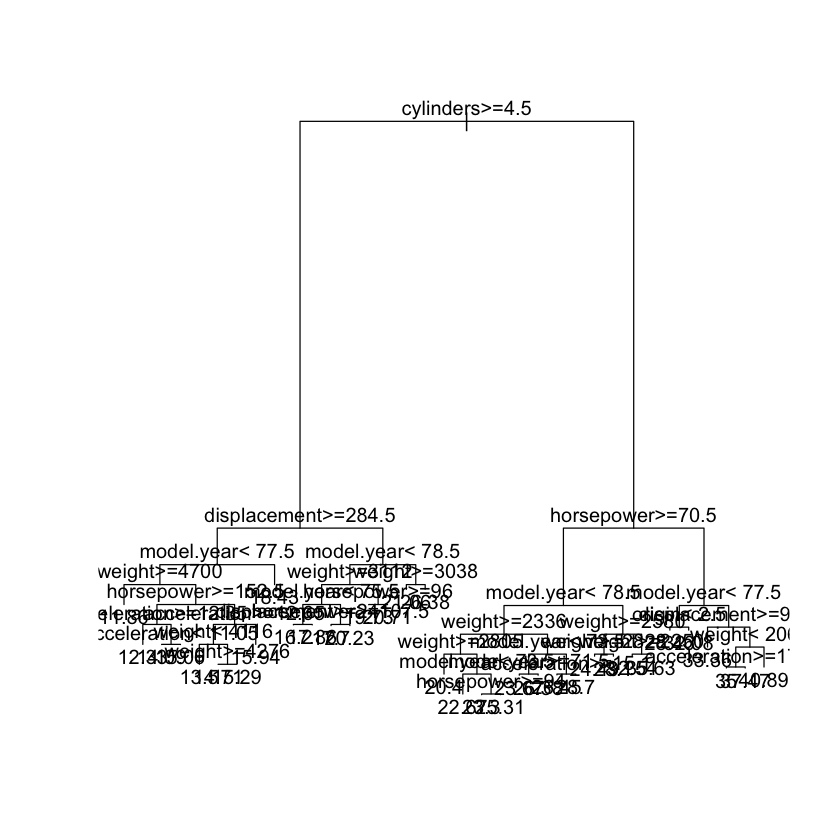

In [8]:
# we are setting some hyperparameters to be rediculous so we will overfit on purpose
model <- rpart(mpg ~ ., data = train, method = 'anova', control = list(minsplit = 1, cp = 0.00001))
plot(model)
text(model)

In [9]:
preds <- predict(model, test)
postResample(preds, test$mpg)

RMSE  Rsquared       MAE 
3.0339931 0.8479339 2.2059208

In [10]:
preds <- predict(model, train)
postResample(preds, train$mpg)
# test scoring much lower than train, sign of overitting

RMSE  Rsquared       MAE 
2.2777846 0.9151829 1.6406530

In [11]:
summary(model)
# still don't have any leaf nodes with 1 sample -- that would be the most extreme overfitting

Call:
rpart(formula = mpg ~ ., data = train, method = "anova", control = list(minsplit = 1, 
    cp = 1e-05))
  n= 321 

             CP nsplit  rel error    xerror       xstd
1  5.725142e-01      0 1.00000000 1.0081238 0.07020119
2  1.089547e-01      1 0.42748577 0.4527942 0.04299619
3  5.147810e-02      2 0.31853104 0.3626847 0.03754741
4  4.037908e-02      3 0.26705293 0.3091627 0.03590711
5  3.042075e-02      4 0.22667385 0.2781028 0.03085257
6  2.296405e-02      5 0.19625310 0.2399147 0.02924197
7  1.728120e-02      6 0.17328905 0.2190557 0.02759687
8  9.645794e-03      7 0.15600785 0.2090666 0.02767368
9  9.129051e-03      8 0.14636205 0.2020024 0.02519509
10 6.494879e-03      9 0.13723300 0.2013716 0.02563023
11 6.491599e-03     10 0.13073812 0.1934702 0.02304049
12 4.879437e-03     11 0.12424652 0.1980134 0.02313741
13 4.168554e-03     12 0.11936709 0.2001493 0.02335683
14 3.173261e-03     13 0.11519853 0.1962896 0.02526962
15 2.873375e-03     14 0.11202527 0.2004901 0.02618506